In [1]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd

CLASSES= ["Bull","Bear"]
LABEL_BULL= CLASSES.index("Bull")
LABEL_BEAR= CLASSES.index("Bear")

datasets= np.load("datasetsTSLA.npz")

x_train, y_train= datasets["x_train"], datasets["y_train"]
x_val, y_val= datasets["x_val"], datasets["y_val"]
x_test, y_test= datasets["x_test"], datasets["y_test"]


label_distribution = pd.DataFrame([{"Dataset": "train",
                                    "BULL": np.count_nonzero(y_train == LABEL_BULL),
                                   "BEAR": np.count_nonzero(y_train == LABEL_BEAR)},
                                  {"Dataset": "val",
                                    "BULL": np.count_nonzero(y_val == LABEL_BULL),
                                   "BEAR": np.count_nonzero(y_val == LABEL_BEAR)},
                                   {"Dataset": "test",
                                    "BULL": np.count_nonzero(y_test == LABEL_BULL),
                                   "BEAR": np.count_nonzero(y_test == LABEL_BEAR)}])

In [2]:
label_distribution

,Dataset,BULL,BEAR
0,train,881,809
1,val,246,237
2,test,112,112


In [3]:
#load model
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

model= keras.models.load_model("best_modelTSLA.hdf5")


In [4]:
# evaluate model
model.evaluate(x_test, to_categorical(y_test))

7/7 [==============================] - 2s 42ms/step - loss: 0.6993 - accuracy: 0.5402


[0.6992577910423279, 0.5401785969734192]

In [5]:
# confusion matrix

from tensorflow.math import argmax, confusion_matrix

y_pred_prob= model.predict(x_test)
y_pred= argmax(y_pred_prob, axis=-1)
cm= confusion_matrix(y_test, y_pred, num_classes= len(CLASSES)).numpy()

7/7 [==============================] - 1s 37ms/step


In [6]:
cm

array([[85, 27],
       [76, 36]])

Text(33.22222222222222, 0.5, 'Label')

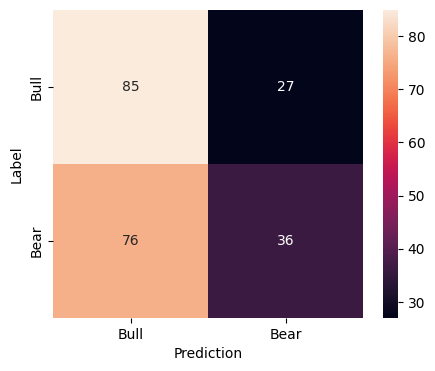

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (5,4))
sns.heatmap(cm, xticklabels=CLASSES, yticklabels=CLASSES,
           annot=True,fmt='g')
plt.xlabel("Prediction")
plt.ylabel("Label")

In [8]:
n_bull_pred= cm[LABEL_BULL, LABEL_BULL] + cm[LABEL_BEAR, LABEL_BULL]
n_bull_true_pos= cm[LABEL_BULL, LABEL_BULL]
bull_accuracy= n_bull_true_pos / n_bull_pred if n_bull_pred > 0 else 0


n_bear_pred= cm[LABEL_BULL, LABEL_BEAR] + cm[LABEL_BEAR, LABEL_BEAR]
n_bear_true_pos= cm[LABEL_BEAR, LABEL_BEAR]
bear_accuracy= n_bear_true_pos / n_bear_pred if n_bear_pred > 0 else 0

n_total_pred= n_bull_pred + n_bear_pred
n_total_true_pos= n_bull_true_pos + n_bear_true_pos
total_accuracy= n_total_true_pos / n_total_pred if n_total_pred > 0 else 0


pd.DataFrame([{ "Prediction": "Bull", "Accuracy": bull_accuracy },
            { "Prediction": "Bear", "Accuracy": bear_accuracy },
             { "Prediction": "Total", "Accuracy": total_accuracy }])

,Prediction,Accuracy
0,Bull,0.527950
1,Bear,0.571429
2,Total,0.540179
